<a href="https://colab.research.google.com/github/rajatpal00/Close-Price--Prediction-of-Nifty50-/blob/main/Rajat_Pal_Capstone_project_on_Nifty50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capston Project**

We are given a Nifty50 data set for 20 years from jan 2000 to may 2021.

*The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange*



Data contain opening, closing, high and low price of each day, our task is to predict closing price for next days.

In [1]:
#importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone project/Yes bank share price/Nifty50_data.csv')

In [3]:
data_df.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


##**EDA**

In [4]:
# exploring for NA values
data_df.isna().sum()

Date      0
Open     35
High     35
Low      35
Close    35
dtype: int64

We can see that there are 35 values which are NA and all featuers have same na values that means market could be closed on that day, so it would be better to drop these na values

In [5]:
data_df.dropna(inplace=True)

In [6]:
data_df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5266 entries, 0 to 5300
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5266 non-null   object 
 1   Open    5266 non-null   float64
 2   High    5266 non-null   float64
 3   Low     5266 non-null   float64
 4   Close   5266 non-null   float64
dtypes: float64(4), object(1)
memory usage: 246.8+ KB


In [8]:
#converting the date in Datetime type
data_df['Date']= pd.to_datetime(data_df['Date'])

In [10]:
data_df.describe()

,Open,High,Low,Close
count,5266.000000,5266.000000,5266.000000,5266.000000
mean,5551.787316,5588.846043,5506.832156,5548.545092
std,3582.719644,3594.485464,3561.245855,3578.111274
min,853.000000,877.000000,849.950000,854.200000
25%,2057.987500,2074.525000,2045.950000,2058.750000
50%,5213.675049,5252.199951,5163.449951,5211.025000
75%,8261.987305,8308.112793,8216.375244,8262.199707
max,15371.450195,15431.750000,15243.400391,15314.700195


From describe we can see that all the data features are close to each other there is no difference in the values of these data

* Mean and meadian of data of every feature is some what close to each other.
* we can see that min value of these data start from $850$ and max value goes til
$15370$ which mean that range of data points is quite high.
* With the help of visualization graph we can see how in which year the values have gone high.


##**Data Visualization**

Lets start by ploting a line plot for close price with respect to time 

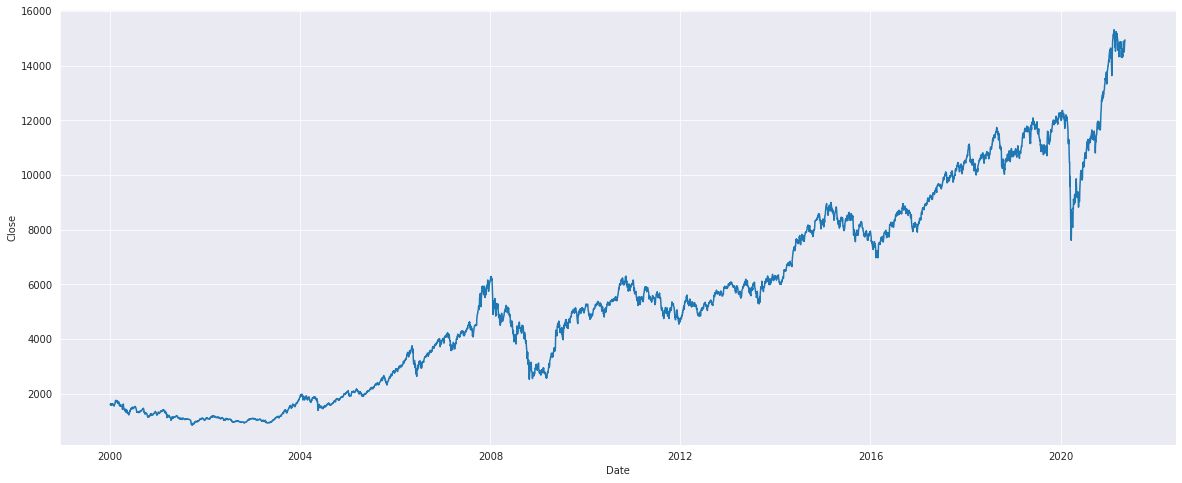

In [15]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date',y='Close',data= data_df)



BY looking at the line plot we can understand the **over all Trend** is **increasing** , As we  can see that in year 2000 close price started by close to 1600

In 2002 we recorded lowest close price for Nifty50

We can see increase and decrease in the close price as we move in time to 2021 but we cant see any **seasonality** so far in the plot.

In this plot we can see there are two places where the stock price droped drastically.
* we can see drastic drop in price in near near to 2008 that is cause by global regression of 2008
* Second drastic drop can be seen in 2020 due to lockdown which was implemented in the country.
* we can also witness exponential growth in the stocks price as the lockdown ended.

Apart from these time we dont see any significant drop or growth in stock price but **overall trend is Increasing**

Lets see how other feature such as opening, high, low have changed with respecct to time
 

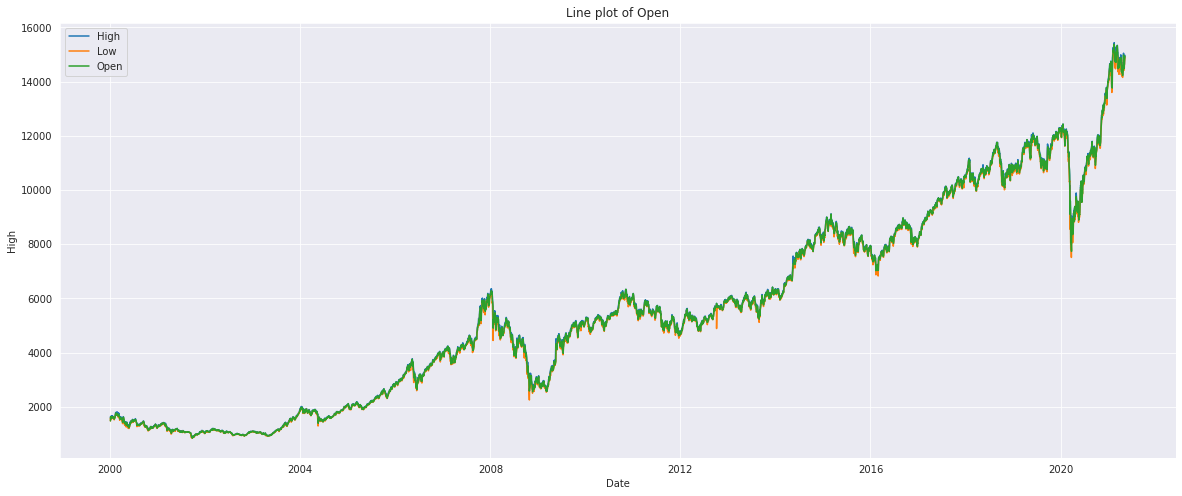

In [14]:
l= ['High',"Low",'Open']
plt.figure(figsize=(20,8))
for i in l:
  sns.lineplot(x='Date',y=i,data=data_df,label = i)
  title = 'Line plot of '+ i
  plt.title(title)
  

From above graph we can conclude that there is only minute difference in the features as the most of the values are overlapping with each other.

Lets see if histogram will give any information of the data


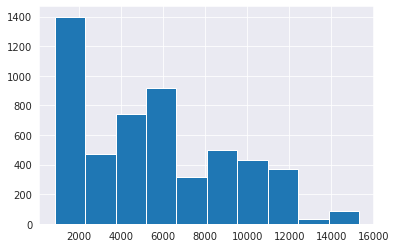

In [16]:
data_df['Close'].hist()

By histrogram we can see that most the days have closing price close to 2000 that is visible by line plot also as in intial years till 2006 we ccan see that stock price was close to 2000 only and it was after 2006 we see growth in stock price

##**Stationary**

Checking of the dependend data is statinary or non-stationary with tyhe help of adfuller 

In [17]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
def adfuller_test(sales):
  result=adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
  for value,label in zip(result,labels):
      print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
      print("weak evidence against null hypothesis,indicating it is non-stationary ")


In [21]:
adfuller_test(data_df['Close'])

ADF Test Statistic : 0.7938385840940072
p-value : 0.9915360574288862
#Lags Used : 29
Number of Observations : 5236
weak evidence against null hypothesis,indicating it is non-stationary 


Checking for randomness of data present in close price

As building a forcasting model on random time series is not possible

In [23]:
#lag plot for finding random in timeseries in data
from pandas.plotting import lag_plot

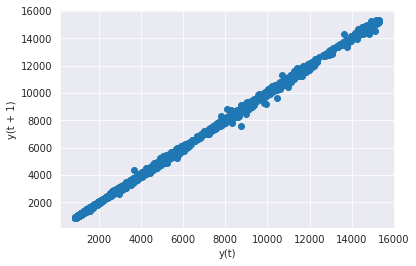

In [24]:
lag_plot(data_df['Close'])

so by above graph we can see that current value and previous value is linearly related so we can say that data is non- random and we can apply forcasting model on this